<a href="https://colab.research.google.com/github/wu-warren/Basketball-Predictions/blob/main/Analysis_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload() # to up file

Saving Reviewed_Final_DF.csv to Reviewed_Final_DF (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Reviewed_Final_DF.csv')

In [ ]:
# Convert 'Game Date' to datetime
if 'Game Date' in data.columns:
    data['Game Date'] = pd.to_datetime(data['Game Date'], errors='coerce')

numeric_data = data.select_dtypes(include=[float, int])

print("Non-numeric columns:", set(data.columns) - set(numeric_data.columns))

print(numeric_data.head())


Non-numeric columns: {'Game Date', 'Home_Team', 'Guest_Team'}
   W/L_Home  days_since_last_Home  Weighted_Var_PTS_Home  \
0         0                     0                    0.0   
1         0                     0                    0.0   
2         0                     0                    0.0   
3         0                     0                    0.0   
4         1                     0                    0.0   

   Weighted_Var_FGM_Home  days_since_last_Guest  Weighted_Var_PTS_Guest  \
0                    0.0                      0                     0.0   
1                    0.0                      0                     0.0   
2                    0.0                      0                     0.0   
3                    0.0                      0                     0.0   
4                    0.0                      0                     0.0   

   Weighted_Var_FGM_Guest  W/L_Home_unweighted_avg  PTS_Home_unweighted_avg  \
0                     0.0                      

## Collinearity testing

In [ ]:
#collinearity testing

from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(table):
    table = table.select_dtypes(np.number)
    vif_data = pd.DataFrame()
    vif_data["feature"] = table.columns
    vif_data["VIF"] = [variance_inflation_factor(table.values, i) for i in range(len(table.columns))]
    highest_vif_col, highest_vif_value = vif_data.sort_values(by = "VIF", ascending= False).iloc[0]
    return highest_vif_col, highest_vif_value

def check_vif_table(table):
    table = table.select_dtypes(np.number)
    vif_data = pd.DataFrame()
    vif_data["feature"] = table.columns
    vif_data["VIF"] = [variance_inflation_factor(table.values, i) for i in range(len(table.columns))]
    return vif_data.sort_values(by = "VIF", ascending= False)

def perform_vif(table, vif_threshold):
    new_table = table.copy()  # Make a copy to avoid modifying the original DataFrame
    while True:
        highest_vif_col, highest_vif = check_vif(new_table)
        if highest_vif < vif_threshold:
            break  # Stop when the highest VIF is below the threshold
        print(f"Removing {highest_vif_col} for a VIF value of {highest_vif}")
        new_table = new_table.drop(columns=[highest_vif_col])
    return new_table


In [ ]:
low_multicol_data = perform_vif(data.drop(["W/L_Home", "Game Date", "Home_Team", "Guest_Team"], axis = 1), 10)
low_multicol_data = pd.concat([low_multicol_data, data[["W/L_Home", "Game Date", "Home_Team", "Guest_Team"]]], axis= 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing Weighted_Guest_FTM for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing FGM_Guest_unweighted_avg for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing Weighted_Home_OREB for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing DREB_Home_unweighted_avg for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PTS_Guest_unweighted_avg for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing Weighted_Home_PTS for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing FTM_Home_unweighted_avg for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing REB_Guest_unweighted_avg for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing +/-_Guest_unweighted_avg for a VIF value of inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing Weighted_Guest_REB for a VIF value of inf
Removing PTS_Home_unweighted_avg for a VIF value of 907241631.9453382
Removing FGM_Home_unweighted_avg for a VIF value of 411313311.4172465
Removing FGA_Home_unweighted_avg for a VIF value of 74407422.09587194
Removing 3PA_Home_unweighted_avg for a VIF value of 17358409.662007425
Removing FG%_Guest_unweighted_avg for a VIF value of 16872127.06104314
Removing FGA_Guest_unweighted_avg for a VIF value of 13562676.213567115
Removing 3PA_Guest_unweighted_avg for a VIF value of 9503097.229782773
Removing FG%_Home_unweighted_avg for a VIF value of 5367427.147790043
Removing REB_Home_unweighted_avg for a VIF value of 2215885.1008503675
Removing FTA_Guest_unweighted_avg for a VIF value of 1007778.3531997239
Removing 3P%_Home_unweighted_avg for a VIF value of 806094.4786640649
Removing 3P%_Guest_unweighted_avg for a VIF value of 670881.8962116522
Removing Weighted_Guest_PTS for a VIF value of 650964.283325527
Removing DREB_Guest_unweighted_avg f

In [ ]:
low_multicol_data.dtypes

,0
days_since_last_Home,int64
Weighted_Var_PTS_Home,float64
Weighted_Var_FGM_Home,float64
days_since_last_Guest,int64
Weighted_Var_PTS_Guest,float64
Weighted_Var_FGM_Guest,float64
+/-_Home_unweighted_avg,float64
Weighted_Home_+/-,float64
Weighted_Guest_+/-,float64
W/L_Home,int64


In [ ]:
# Features (X) and the target variable (y)
# 'W/L_Home' is the target variable
X = low_multicol_data.drop(columns=["W/L_Home", "Game Date", "Home_Team", "Guest_Team"]) # EVAN edit, replaced numerica data with low_multi_col data
y = low_multicol_data['W/L_Home']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid for Ridge and Lasso
alpha_values = np.logspace(-4, 4, 100)  # Range of alpha

# Ridge regression with cross-validation
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

# Lasso regression with cross-validation
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha values
best_ridge_alpha = ridge_cv.best_params_['alpha']
best_lasso_alpha = lasso_cv.best_params_['alpha']

print(f"Best Ridge Alpha: {best_ridge_alpha}")
print(f"Best Lasso Alpha: {best_lasso_alpha}")

# Training Ridge and Lasso with best alpha
ridge_best = Ridge(alpha=best_ridge_alpha).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=best_lasso_alpha, max_iter=10000).fit(X_train_scaled, y_train)

# Evaluate performance on the test set
ridge_preds = ridge_best.predict(X_test_scaled)
lasso_preds = lasso_best.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)

print(f"Ridge Test MSE: {ridge_mse}")
print(f"Lasso Test MSE: {lasso_mse}")

# Feature importance from Lasso (coefficients that shrink to zero)
lasso_coefficients = pd.Series(lasso_best.coef_, index=X.columns)
important_features_lasso = lasso_coefficients[lasso_coefficients != 0].sort_values()

print("Important Features from Lasso:")
print(important_features_lasso)


Best Ridge Alpha: 114.9756995397738
Best Lasso Alpha: 0.018307382802953697
Ridge Test MSE: 0.18692838468828324
Lasso Test MSE: 0.1854375728876141
Important Features from Lasso:
Weighted_Guest_+/-        -0.124863
+/-_Home_unweighted_avg   -0.012823
Weighted_Var_FGM_Home      0.011569
Weighted_Home_+/-          0.150548
dtype: float64


In [ ]:
# Features we don't want anymore
features_unused = lasso_coefficients[lasso_coefficients == 0].sort_values()

print("Features w oefficient 0 from Lasso:")
print(features_unused)

Features w oefficient 0 from Lasso:
days_since_last_Home      0.0
Weighted_Var_PTS_Home     0.0
days_since_last_Guest     0.0
Weighted_Var_PTS_Guest   -0.0
Weighted_Var_FGM_Guest   -0.0
dtype: float64


In [ ]:
# Features from Ridge
best_ridge = ridge_cv.best_estimator_

# Retrieve coefficients
ridge_coeffs = best_ridge.coef_

ridge_features = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_coeffs
})

ridge_features_sorted = ridge_features.sort_values(by='Coefficient', key=abs, ascending=False)

print(ridge_features_sorted)

                   Feature  Coefficient
7        Weighted_Home_+/-     0.149806
8       Weighted_Guest_+/-    -0.127949
6  +/-_Home_unweighted_avg    -0.031332
2    Weighted_Var_FGM_Home     0.025554
1    Weighted_Var_PTS_Home     0.007714
4   Weighted_Var_PTS_Guest    -0.007255
3    days_since_last_Guest     0.005348
5   Weighted_Var_FGM_Guest    -0.002483
0     days_since_last_Home    -0.000187


In [ ]:
important_features = important_features_lasso.index.tolist()
print("Selected Important Features:", important_features)

Selected Important Features: ['Weighted_Guest_+/-', '+/-_Home_unweighted_avg', 'Weighted_Var_FGM_Home', 'Weighted_Home_+/-']


In [ ]:
X = numeric_data[important_features]
y = numeric_data['W/L_Home']

## Models

In [ ]:
# KNN - Evan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


tscv = TimeSeriesSplit(n_splits=6)

knn_35 = KNeighborsClassifier(n_neighbors= 35) # Approximately sqrt(n) neighbors

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

selected_features = important_features

X = numeric_data[selected_features]
y = numeric_data['W/L_Home']

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_35.fit(X_train, y_train)
    y_pred = knn_35.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
print(f"Mean Accuracy of KNN with 35 neighbors & 5-folds: {np.mean(accuracy_scores):.2f}, Standard Deviation: {np.std(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f} Std: {np.std(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} Std {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} Std {np.std(f1_scores):.2f}")



Mean Accuracy of KNN with 35 neighbors & 5-folds: 0.70, Standard Deviation: 0.03
Mean Precision: 0.70 Std: 0.04
Mean Recall: 0.68 Std 0.05
Mean F1 Score: 0.69 Std 0.02


In [ ]:
# Random forest

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

X = numeric_data[selected_features]
y = numeric_data['W/L_Home']

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
print(f"Mean Accuracy of Random forest with 5-folds: {np.mean(accuracy_scores):.2f}, Standard Deviation: {np.std(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f} Std: {np.std(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} Std {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} Std {np.std(f1_scores):.2f}")

NameError: name 'rf_model' is not defined

In [ ]:
data = data.sort_values(by=['Game Date'], ascending=[True]) # Keep shuffling randomly, need another column to stay stable
data

,Game Date,Home_Team,Guest_Team,W/L_Home,days_since_last_Home,Weighted_Var_PTS_Home,Weighted_Var_FGM_Home,days_since_last_Guest,Weighted_Var_PTS_Guest,Weighted_Var_FGM_Guest,...,Weighted_Home_TOV,Weighted_Guest_TOV,Weighted_Home_PF,Weighted_Guest_PF,Weighted_Home_+/-,Weighted_Guest_+/-,Weighted_Home_FT%,Weighted_Guest_FT%,Weighted_Home_2P%,Weighted_Guest_2P%
0,2023-10-24,GSW,PHX,0,0,0.000000,0.000000,0,0.000000,0.000000,...,11.000000,19.000000,23.000000,22.000000,-4.000000,4.000000,78.571429,76.470588,44.827586,50.000000
1,2023-10-24,DEN,LAL,0,0,0.000000,0.000000,0,0.000000,0.000000,...,12.000000,12.000000,18.000000,15.000000,-12.000000,12.000000,75.000000,75.000000,50.819672,59.649123
13,2023-10-25,MIA,DET,0,0,0.000000,0.000000,0,0.000000,0.000000,...,17.000000,7.000000,23.000000,18.000000,-1.000000,1.000000,60.000000,80.769231,50.000000,41.428571
12,2023-10-25,IND,WAS,0,0,0.000000,0.000000,0,0.000000,0.000000,...,14.000000,12.000000,11.000000,23.000000,-23.000000,23.000000,79.310345,91.666667,48.611111,56.250000
11,2023-10-25,NYK,BOS,0,0,0.000000,0.000000,0,0.000000,0.000000,...,11.000000,13.000000,22.000000,22.000000,-4.000000,4.000000,53.846154,84.615385,32.142857,65.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,2024-04-14,BOS,WAS,0,2,89.396364,13.163636,2,226.464132,40.698843,...,11.200000,14.090909,16.618182,18.109091,0.109091,3.090909,83.176312,75.020210,53.613877,58.208458
1216,2024-04-14,OKC,DAL,0,2,389.617851,35.280661,2,110.211570,32.446281,...,14.163636,12.854545,16.436364,16.545455,-13.836364,7.090909,81.110116,77.423313,52.408218,52.980576
1215,2024-04-14,PHI,BKN,1,2,91.416860,17.571570,2,193.571570,20.304132,...,13.072727,13.690909,17.672727,16.345455,9.709091,-8.000000,82.417582,77.952756,49.059233,52.436032
1221,2024-04-14,CLE,CHA,0,2,116.160661,18.721983,2,124.015207,26.636033,...,13.690909,15.036364,15.109091,14.781818,-5.763636,4.945455,79.431929,77.844311,54.795022,56.817289


## Bagging with 5-folds

In [ ]:
# Bagging with k-fold

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

data = data.sort_values(by=['Game Date', 'Home_Team'], ascending=[True, True])
selected_features = important_features

numeric_data = data.select_dtypes(include=[float, int])
X = numeric_data[selected_features]
y = data['W/L_Home']

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# K-Fold loop
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    bagging_model = BaggingClassifier(n_estimators = 100, random_state = 42)
    bagging_model.fit(X_train, y_train)
    y_test_pred = bagging_model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_test_pred))
    precision_scores.append(precision_score(y_test, y_test_pred))
    recall_scores.append(recall_score(y_test, y_test_pred))
    f1_scores.append(f1_score(y_test, y_test_pred))
print(f"Mean Accuracy of Bagging with 5-folds: {np.mean(accuracy_scores):.2f}, Standard Deviation: {np.std(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f} Std: {np.std(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} Std {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} Std {np.std(f1_scores):.2f}")

Mean Accuracy of Bagging with 5-folds: 0.71, Standard Deviation: 0.02
Mean Precision: 0.70 Std: 0.01
Mean Recall: 0.68 Std 0.04
Mean F1 Score: 0.69 Std 0.02


## Gradient Boosting with 5-folds

In [ ]:
# Gradient Boosting with kfold

from sklearn.ensemble import GradientBoostingClassifier

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

# K-Fold Cross-Validation Loop
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    boost_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
    boost_model.fit(X_train, y_train)

    y_pred = boost_model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} Std: {np.std(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f} Std: {np.std(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} Std {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} Std {np.std(f1_scores):.2f}")

Mean Accuracy: 0.71 Std: 0.02
Mean Precision: 0.70 Std: 0.03
Mean Recall: 0.70 Std 0.06
Mean F1 Score: 0.70 Std 0.03


## Decision Tree

In [ ]:
# Decision tree w 5 folds

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} Std: {np.std(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f} Std: {np.std(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} Std {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} Std {np.std(f1_scores):.2f}")

Mean Accuracy: 0.71 Std: 0.01
Mean Precision: 0.70 Std: 0.03
Mean Recall: 0.69 Std 0.08
Mean F1 Score: 0.69 Std 0.03


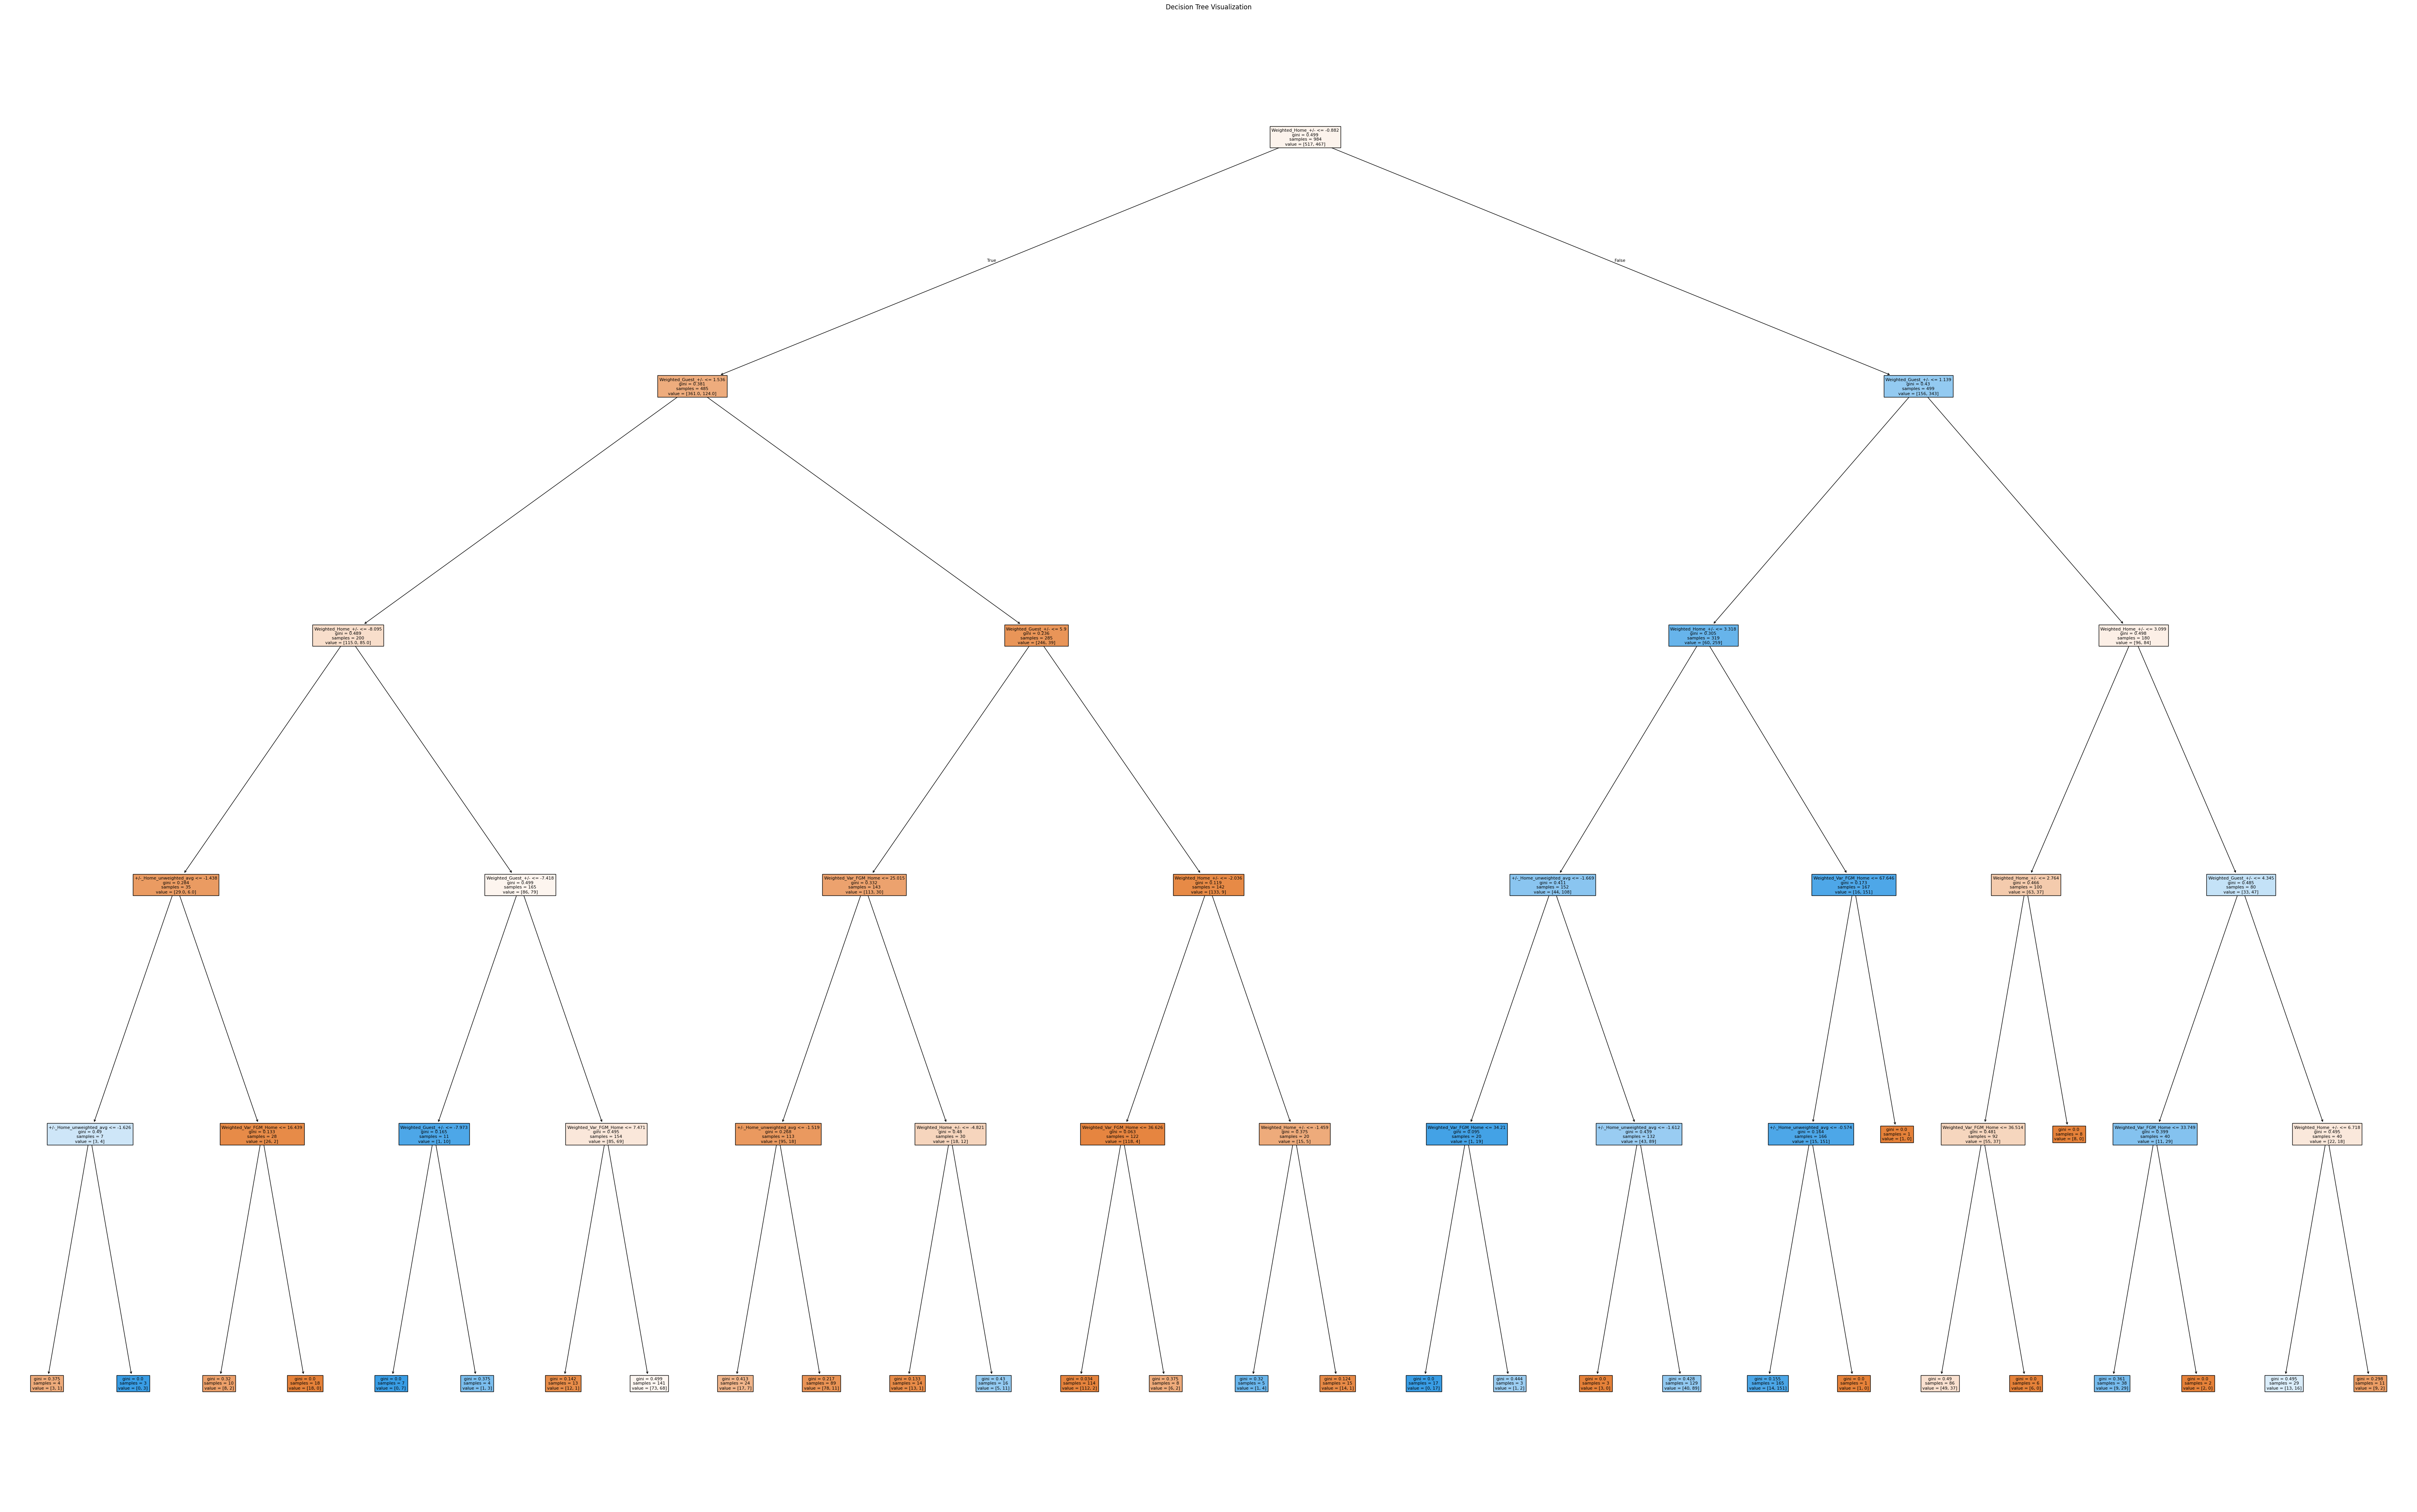

In [ ]:
# Visualize DT
plt.figure(figsize=(80, 50))
plot_tree(
    dtree,
    feature_names=important_features,            #
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


## KNN

In [ ]:
# KNN - Evan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


tscv = TimeSeriesSplit(n_splits=6)

knn_35 = KNeighborsClassifier(n_neighbors= 35)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

selected_features = important_features

X = numeric_data[selected_features]
y = numeric_data['W/L_Home']

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_35.fit(X_train, y_train)
    y_pred = knn_35.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
print(f"Mean Accuracy of KNN with 35 neighbors & 5-folds: {np.mean(accuracy_scores):.2f}, Standard Deviation: {np.std(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f} Std: {np.std(precision_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} Std {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} Std {np.std(f1_scores):.2f}")




Mean Accuracy of KNN with 35 neighbors & 5-folds: 0.70, Standard Deviation: 0.03
Mean Precision: 0.71 Std: 0.04
Mean Recall: 0.69 Std 0.06
Mean F1 Score: 0.70 Std 0.03


## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a PCA pipeline
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=0.95))  # PCA to retain 95% variance
])

# Apply PCA to the data
X_pca = pca_pipeline.fit_transform(X)

# Split the PCA transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# K-Fold Cross Validation with PCA-transformed Data
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_pca = []
precision_scores_pca = []
recall_scores_pca = []
f1_scores_pca = []

for train_index, test_index in kfold.split(X_train_pca):  # Use X_train_pca
    X_train_fold, X_test_fold = X_train_pca[train_index], X_train_pca[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train a model (e.g., RandomForestClassifier) on the PCA-transformed data
    rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_pca.fit(X_train_fold, y_train_fold)
    y_pred_pca = rf_model_pca.predict(X_test_fold)

    accuracy_scores_pca.append(accuracy_score(y_test_fold, y_pred_pca))
    precision_scores_pca.append(precision_score(y_test_fold, y_pred_pca))
    recall_scores_pca.append(recall_score(y_test_fold, y_pred_pca))
    f1_scores_pca.append(f1_score(y_test_fold, y_pred_pca))

print(f"PCA - Mean Accuracy: {np.mean(accuracy_scores_pca):.2f}, Std Dev: {np.std(accuracy_scores_pca):.2f}")
print(f"PCA - Mean Precision: {np.mean(precision_scores_pca):.2f}, Std Dev: {np.std(precision_scores_pca):.2f}")
print(f"PCA - Mean Recall: {np.mean(recall_scores_pca):.2f}, Std Dev: {np.std(recall_scores_pca):.2f}")
print(f"PCA - Mean F1 Score: {np.mean(f1_scores_pca):.2f}, Std Dev: {np.std(f1_scores_pca):.2f}")

PCA - Mean Accuracy: 0.50, Std Dev: 0.02
PCA - Mean Precision: 0.47, Std Dev: 0.05
PCA - Mean Recall: 0.42, Std Dev: 0.06
PCA - Mean F1 Score: 0.44, Std Dev: 0.04


# SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

X = numeric_data[important_features]
y = data['W/L_Home']

linear_model = svm.SVC(kernel='linear')

# k-fold cross-validation
# k = 5 # 5-Fold
# linear_svm_scores = cross_val_score(linear_model, X, y, cv=k, scoring='accuracy')

# print(f"Accuracy for Each Fold: {linear_svm_scores}")
# print(f"Mean Accuracy from {k}-Fold Cross-Validation: {linear_svm_scores.mean():.2f}")

In [ ]:
gaussian_model = svm.SVC()

# k-fold cross-validation
# k = 5 # 5-Fold
# gaussian_svm_scores = cross_val_score(gaussian_model, X, y, cv=k, scoring='accuracy')

# print(f"Accuracy for Each Fold: {gaussian_svm_scores}")
# print(f"Mean Accuracy from {k}-Fold Cross-Validation: {gaussian_svm_scores.mean():.2f}")

In [ ]:
print(y.value_counts(normalize=True))  # Proportion of each class to check class imbalance. No imbalance.

W/L_Home
0    0.518699
1    0.481301
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import cross_validate

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# cross-validation
gaussian_svm_scores = cross_validate(gaussian_model, X, y, cv=5, scoring=scoring_metrics, return_train_score=True)

print(f"Training Accuracy for Each Fold: {gaussian_svm_scores['train_accuracy']}")
print(f"Validation Accuracy for Each Fold: {gaussian_svm_scores['test_accuracy']}")
print(f"\nTraining Precision for Each Fold: {gaussian_svm_scores['train_precision']}")
print(f"Validation Precision for Each Fold: {gaussian_svm_scores['test_precision']}")
print(f"\nTraining Recall for Each Fold: {gaussian_svm_scores['train_recall']}")
print(f"Validation Recall for Each Fold: {gaussian_svm_scores['test_recall']}")
print(f"\nTraining F1 Score for Each Fold: {gaussian_svm_scores['train_f1']}")
print(f"Validation F1 Score for Each Fold: {gaussian_svm_scores['test_f1']}")

print(f"\nMean Training Accuracy: {gaussian_svm_scores['train_accuracy'].mean():.2f}")
print(f"Mean Validation Accuracy: {gaussian_svm_scores['test_accuracy'].mean():.2f}")
print(f"\nMean Training Precision: {gaussian_svm_scores['train_precision'].mean():.2f}")
print(f"Mean Validation Precision: {gaussian_svm_scores['test_precision'].mean():.2f}")
print(f"\nMean Training Recall: {gaussian_svm_scores['train_recall'].mean():.2f}")
print(f"Mean Validation Recall: {gaussian_svm_scores['test_recall'].mean():.2f}")
print(f"\nMean Training F1 Score: {gaussian_svm_scores['train_f1'].mean():.2f}")
print(f"Mean Validation F1 Score: {gaussian_svm_scores['test_f1'].mean():.2f}")

NameError: name 'gaussian_model' is not defined

# Logistic Regression Classifier

In [ ]:
# Calculate the distribution of each label
label_distribution = y.value_counts(normalize=True) * 100  # Percentage distribution
absolute_counts = y.value_counts()  # Absolute counts

# Display the results
for label, count in absolute_counts.items():
    print(f"Label {label}: {count} instances ({label_distribution[label]:.2f}%)")


Label 0: 638 instances (51.87%)
Label 1: 592 instances (48.13%)


The dataset has a near 50-50 split, so class imbalance does not require special handling.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform X to create X_scaled
X_scaled = scaler.fit_transform(X)

# Initialize lists for metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logreg_model = LogisticRegression(random_state=42)
    logreg_model.fit(X_train, y_train)
    y_pred = logreg_model.predict(X_test)

    # Compute metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='binary'))
    recall_scores.append(recall_score(y_test, y_pred, average='binary'))
    f1_scores.append(f1_score(y_test, y_pred, average='binary'))

# Display results
print(f"Log Reg - Mean Accuracy: {np.mean(accuracy_scores):.2f}, Std Dev: {np.std(accuracy_scores):.2f}")
print(f"Log Reg - Mean Precision: {np.mean(precision_scores):.2f}, Std Dev: {np.std(precision_scores):.2f}")
print(f"Log Reg - Mean Recall: {np.mean(recall_scores):.2f}, Std Dev: {np.std(recall_scores):.2f}")
print(f"Log Reg - Mean F1 Score: {np.mean(f1_scores):.2f}, Std Dev: {np.std(f1_scores):.2f}")

Log Reg - Mean Accuracy: 0.74, Std Dev: 0.02
Log Reg - Mean Precision: 0.74, Std Dev: 0.02
Log Reg - Mean Recall: 0.71, Std Dev: 0.04
Log Reg - Mean F1 Score: 0.72, Std Dev: 0.02


# LDA and QDA

In [ ]:
# LDA and QDA with 5-fold CV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
#!pip install pingouin
from pingouin import multivariate_normality

In [ ]:
#Test of multivariate normality
X = numeric_data[important_features]
y = data['W/L_Home']

multivariate_normality(numeric_data)

# violates assumption of normality, but still performing well accuracy-wise

HZResults(hz=4920, pval=0.0, normal=False)

In [ ]:
#LDA
accuracy_scores_lda = []
precision_scores_lda = []
recall_scores_lda = []
f1_scores_lda = []

kf = KFold(n_splits = 5)
lda = LinearDiscriminantAnalysis()

print(f"Model: LDA")

for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]

  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  lda.fit(X_train, y_train)
  y_pred = lda.predict(X_test)

  accuracy_scores_lda.append(accuracy_score(y_test, y_pred))
  precision_scores_lda.append(precision_score(y_test, y_pred, average='binary'))
  recall_scores_lda.append(recall_score(y_test, y_pred, average='binary'))
  f1_scores_lda.append(f1_score(y_test, y_pred, average='binary'))

  print(f"Fold: {i}, accuracy score: {accuracy_scores_lda[i]}")
  # decreasing accuracy as the season goes on,
  # weird because a lot of the columns have 0 values or small sample sizes for the first few games of the season
  # could be that these variables are not actually informative,
  # and so when their values are not 0 they are just adding noise to the prediction,
  # decreasing the accuracy

print(f"Folds: 5")
print(f"Mean accuracy score: {(np.mean(accuracy_scores_lda))}")
print(f"Mean precision score: {(np.mean(precision_scores_lda))}")
print(f"Mean recall score: {np.mean(recall_scores_lda)}")
print(f"Mean f1 score: {np.mean(f1_scores_lda)}")

Model: LDA
Fold: 0, accuracy score: 0.8577235772357723
Fold: 1, accuracy score: 0.7317073170731707
Fold: 2, accuracy score: 0.7113821138211383
Fold: 3, accuracy score: 0.6869918699186992
Fold: 4, accuracy score: 0.6991869918699187
Folds: 5
Mean accuracy score: 0.7373983739837399
Mean precision score: 0.7410301036509904
Mean recall score: 0.6994876171206716
Mean f1 score: 0.7181871561003381


In [ ]:
#QDA
accuracy_scores_qda = []
precision_scores_qda = []
recall_scores_qda = []
f1_scores_qda = []

kf = KFold(n_splits = 5)
qda = QuadraticDiscriminantAnalysis()

print(f"Model: QDA")

for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]

  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  qda.fit(X_train, y_train)
  y_pred = qda.predict(X_test)

  accuracy_scores_qda.append(accuracy_score(y_test, y_pred))
  precision_scores_qda.append(precision_score(y_test, y_pred, average='binary'))
  recall_scores_qda.append(recall_score(y_test, y_pred, average='binary'))
  f1_scores_qda.append(f1_score(y_test, y_pred, average='binary'))

  print(f"Fold: {i}, accuracy score: {accuracy_scores_qda[i]}")
  # decreasing accuracy as the season goes on,
  # weird because a lot of the columns have 0 values or small sample sizes for the first few games of the season
  # could be that these variables are not actually informative,
  # and so when their values are not 0 they are just adding noise to the prediction,
  # decreasing the accuracy

print(f"Folds: 5")
print(f"Mean accuracy score: {(np.mean(accuracy_scores_qda))}")
print(f"Mean precision score: {(np.mean(precision_scores_qda))}")
print(f"Mean recall score: {np.mean(recall_scores_qda)}")
print(f"Mean f1 score: {np.mean(f1_scores_qda)}")

Model: QDA
Fold: 0, accuracy score: 0.8373983739837398
Fold: 1, accuracy score: 0.7357723577235772
Fold: 2, accuracy score: 0.7276422764227642
Fold: 3, accuracy score: 0.6991869918699187
Fold: 4, accuracy score: 0.6829268292682927
Folds: 5
Mean accuracy score: 0.7365853658536585
Mean precision score: 0.7461874901272221
Mean recall score: 0.6864611672038307
Mean f1 score: 0.7129316174687192
